In [13]:
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
#plt.style.use('fivethirtyeight')
import matplotlib
matplotlib.rcParams['figure.figsize'] = (16,8)

# Obtendo Dados através da API do Banco Central do Brasil

SGS - Sistema Gerenciador de Séries Temporais - v2.1


Usar site para localizar o codigo para buscar series

https://www3.bcb.gov.br/sgspub/localizarseries/localizarSeries.do?method=prepararTelaLocalizarSeries


In [14]:
def consulta_bc(codigo_bcb):
  url = 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json'.format(codigo_bcb)
  df = pd.read_json(url)
  df['data'] = pd.to_datetime(df['data'], dayfirst=True)
  df.set_index('data', inplace=True)
  return df

In [15]:
ipca = consulta_bc(433)

In [16]:
igpm = consulta_bc(189)

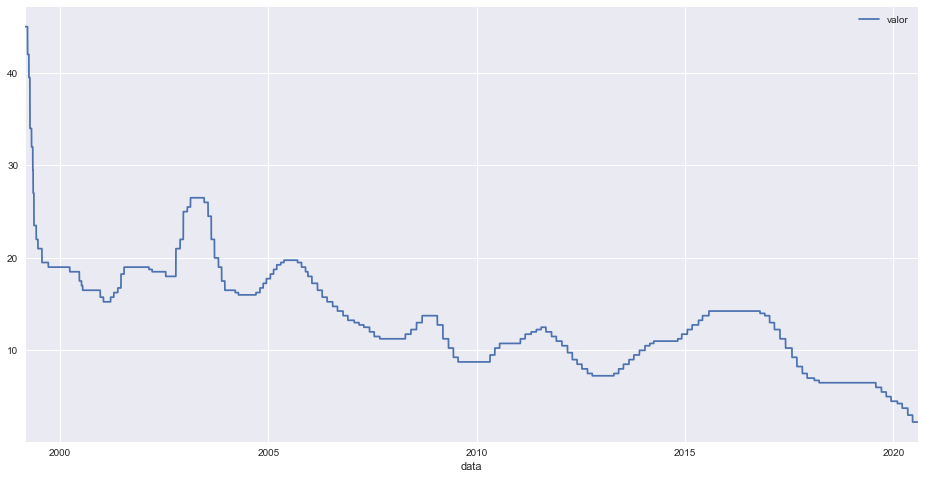

In [17]:
selic_meta = consulta_bc(432)
selic_meta.plot()


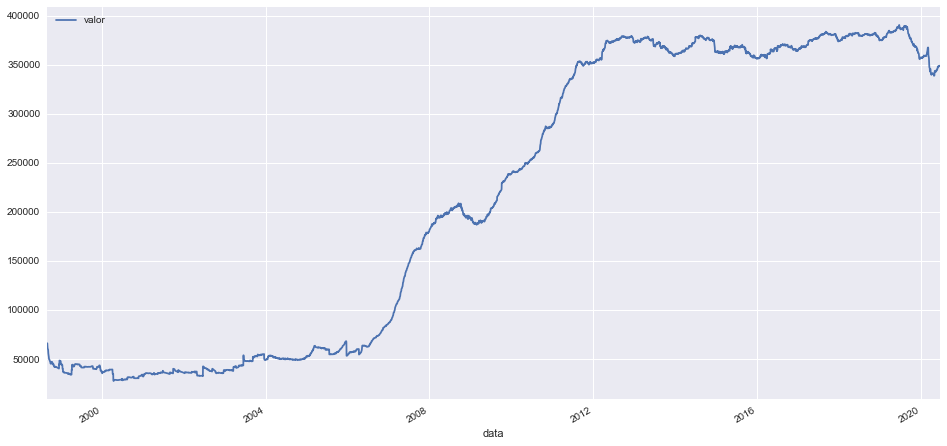

In [18]:
reservas_internacionais = consulta_bc(13621)
reservas_internacionais.plot()

In [19]:
selic_meta

,valor
data,
1999-03-05,45.00
1999-03-06,45.00
1999-03-07,45.00
1999-03-08,45.00
1999-03-09,45.00
...,...
2020-08-01,2.25
2020-08-02,2.25
2020-08-03,2.25


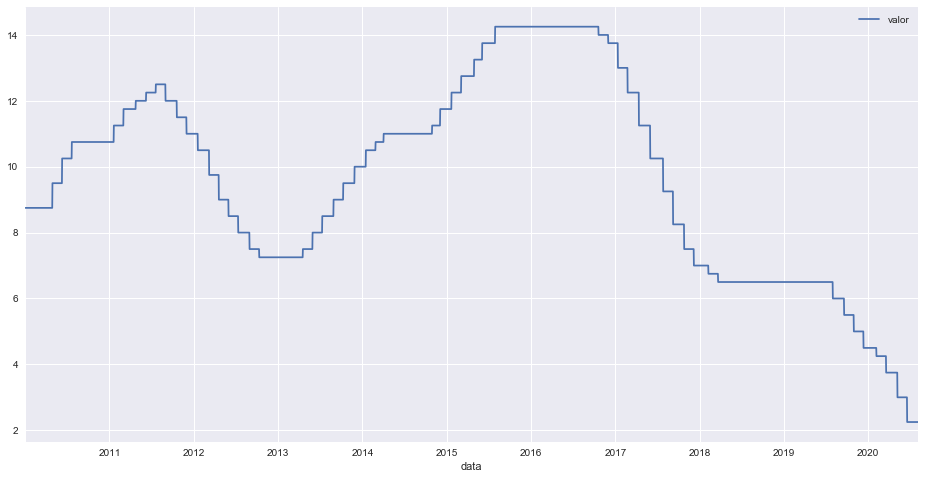

In [20]:
# vamos agora filtrar um periodo menor para estudos
selic_meta.loc[selic_meta.index > '2010-01-01'].plot()